In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm


In [2]:
def generate_data(n, j):
    #np.random.seed(0)
   
    d = np.random.normal(0, 1, n)
    x = np.random.normal(0, j, (n, j))
    e = np.random.normal(0, 1, n)
    
    d = (x.sum(axis=1)/j) + d
    y = d + e #+ (x.sum(axis=1)/j)
    
    return d, x, y

In [3]:
# Set parameters
n = 1000 #number of observations
J = 2 #parameter for x_j
p = 2 #



def generate_est(d,x,y,n,J,p):
    delta = np.zeros((p,J))
    epsilon = np.zeros((n,J))
    D = np.zeros((n,p,J))
    M = np.zeros((J*p,J*p))

    for j in range(J):
        Xj = x[:, j].reshape(-1, 1)
        Dj = np.column_stack((d, Xj))
        
        delta[j] = np.dot(np.linalg.inv(np.dot(Dj.T, Dj)), np.dot(Dj.T, y))
        epsilon[:, j] = y - np.dot(Dj, delta[j])

        D[:,:,j] = Dj
        #fix this code. set the diagonal equal to this. the index for each matrix should be j*p
        M[(j*p):(j*p+p),(j*p):(j*p+p)] = Dj.T.dot(Dj)

    V = np.zeros((J*p,J*p))


    for j in range (J):
        for k in range(J):
            ek_ej = epsilon[:,k].dot(epsilon[:,j])
            V[(k*p):(k*p+p),(j*p):(j*p+p)] = ek_ej*(D[:,:,k].T).dot(D[:,:,j])

    M_inv = np.linalg.inv(M)
    cov = M_inv.dot(V).dot(M_inv)
    delta_vec =  delta.flatten().reshape(2*J,-1) - np.array([[1],[0],[1],[0]]) 

    res = np.sqrt(n)*np.linalg.inv(sqrtm(cov)).dot(delta_vec)
    
    return res[:,0]
    

results = []

for i in range(10*n):
    dn,xn,yn = generate_data(n, J)
    res = generate_est(dn,xn,yn,n,J,p)

    results.append(res)

results= np.array(results)



# Calculate the covariance matrix
cov_matrix = np.cov(results, rowvar=False)
print(cov_matrix)
#print(cov_matrix.shape)
#print(results.shape)
#results2 = np.linalg.inv(sqrtm(cov_matrix)).dot(results.reshape(n,2*J,-1))
#print(np.cov(results2, rowvar=False))

[[ 0.65023136 -0.22374925  0.34623608  0.24403606]
 [-0.22374925  0.83552141  0.23235061  0.13095912]
 [ 0.34623608  0.23235061  0.65377253 -0.2403837 ]
 [ 0.24403606  0.13095912 -0.2403837   0.87804159]]


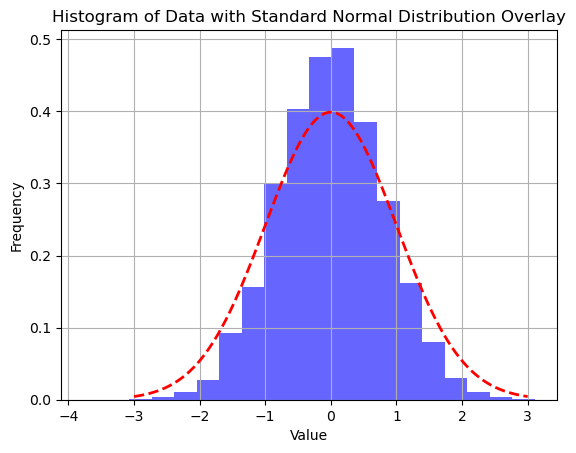

In [4]:
# Plot histogram of the data
plt.hist( results[:,0] , bins=20, density=True, alpha=0.6, color='b')

# Plot standard normal distribution overlay
x = np.linspace(-3, 3, 100)
y = 1/(np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
plt.plot(x, y, 'r--', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data with Standard Normal Distribution Overlay')
plt.grid(True)
plt.show()

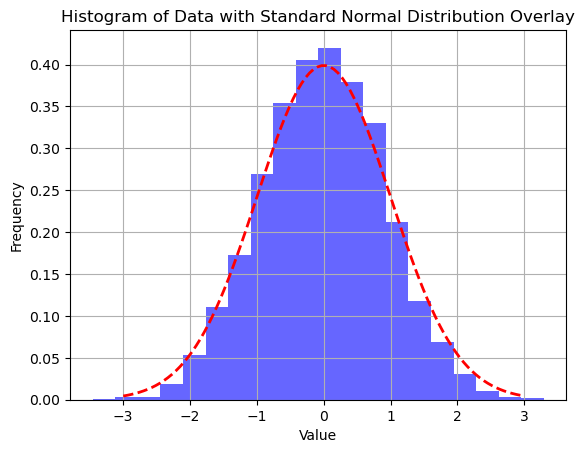

In [5]:
# Plot histogram of the data
plt.hist( results[:,1] , bins=20, density=True, alpha=0.6, color='b')

# Plot standard normal distribution overlay
x = np.linspace(-3, 3, 100)
y = 1/(np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
plt.plot(x, y, 'r--', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data with Standard Normal Distribution Overlay')
plt.grid(True)
plt.show()